# Exploratory Data Analysis - Project 2

Proposal: Exploration and visualization of House Sales characteristics in the USA.

Size of data (rows, columns, megabytes): (21614 Rows, 21 Rows, 780 KB)

Data source location: https://www.kaggle.com/harlfoxem/housesalesprediction

In [85]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [86]:
#reading .csv file
df = pd.read_csv('kc_house_data.csv')

In [87]:
#displaying concise summary of the dataframe
df.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [88]:
#displaying basic statistical details like count, mean, standard deviation, minimum column value and maximum column value 
df.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [89]:
#displaying the first 5 rows in the dataframe
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Missing Values

In [90]:
#Check weather there are any null values
#Here Ture implies that there are null values present. 
df.isnull()
#As there are no cells with True, we can infer that there are no null values present in the dataframe

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

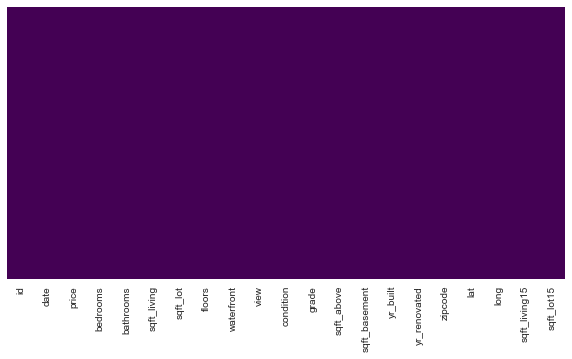

In [91]:
#visualiation of null values.
#Here as the plot area is completely drak, we can conclude that there are no null values present
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

Here, If we find any null values in any of the given columns we must fill those null values by interplolation or sampling technique.

In the preliminary phase of processing the data, we need to change the data types. 
1) Set id column as string data type
2) Set view and waterfront columns as categorcal dat
3) Set date as datetime64
4) For columns that are numeric, we can either set their type as int64 or float64

In [92]:
#Changing the data types of columns 
df['id'] = df['id'].astype('str')
df['date'] = pd.to_datetime(df['date'])
df['view'] = df['view'].astype('category')
df['waterfront'] = df['waterfront'].astype('category')
df['floors'] = df['floors'].astype('float64')
df['grade'] = df['grade'].astype('category')
df['condition'] = df['condition'].astype('category')
df['bedrooms'] = df['bedrooms'].astype('int64')

In [93]:
#displaying concise summary of the dataframe
df.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  object        
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  category      
 9   view           21613 non-null  category      
 10  condition      21613 non-null  category      
 11  grade          21613 non-null  category      
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

<AxesSubplot:xlabel='view', ylabel='count'>

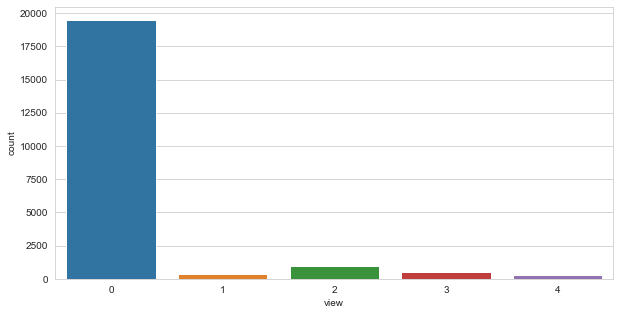

In [94]:
#Visualization of homes that has outside views and their count
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.countplot(x='view', data = df)

<AxesSubplot:xlabel='waterfront', ylabel='count'>

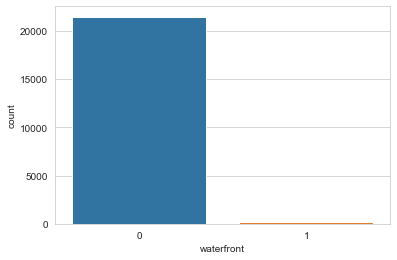

In [95]:
#Visualization of homes that has waterfronts and their count
sns.set_style('whitegrid')
sns.countplot(x='waterfront', data = df)

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

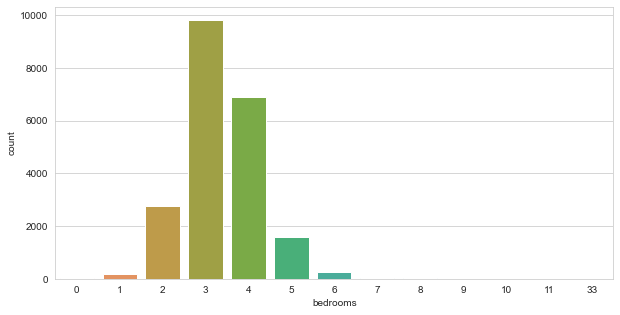

In [96]:
#Visualization of homes that has bedrooms and its count
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.countplot(x='bedrooms', data = df)

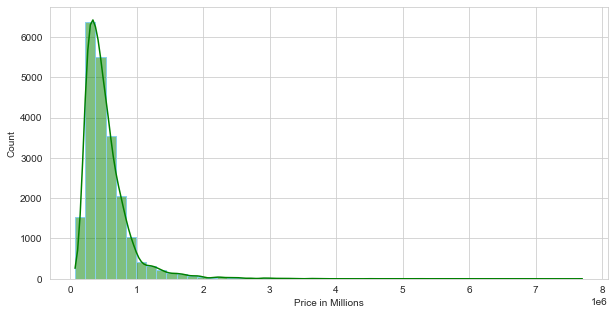

In [97]:
#Distribution of price spend for purchasing a home
plt.figure(figsize=(10,5))
(sns.histplot(df['price'],bins=50,kde=True,color = "green", ec="skyblue")).set(xlabel="Price in Millions", ylabel = "Count")
plt.show()

<AxesSubplot:xlabel='floors', ylabel='count'>

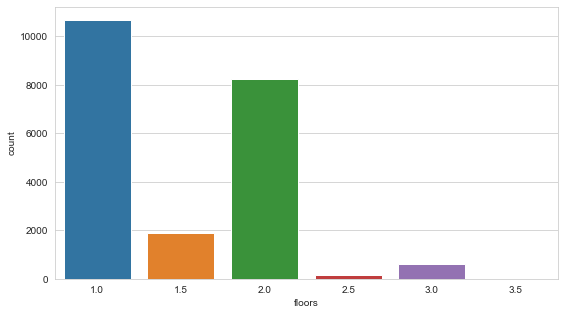

In [98]:
#frequency of number of floors that are purchased
#sns.countplot(x='floors', data=df)
plt.figure(figsize=(9,5))
sns.set_style('whitegrid')
sns.countplot(x='floors', data = df)

[Text(0.5, 6.799999999999994, 'Built year'),
 Text(-1.6999999999999957, 0.5, 'Count')]

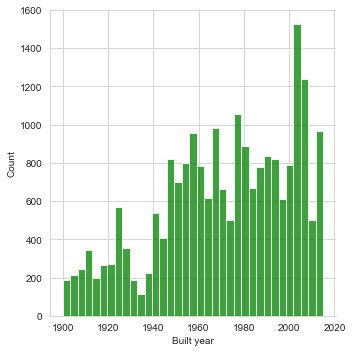

In [99]:
#distribution of frequncies of homes that are sold according to their year build
(sns.displot(df, x="yr_built", multiple="stack", color="g")).ax.set(xlabel="Built year", ylabel = "Count")


[Text(0.5, 0, 'House Prices in Millions'), Text(0, 0.5, 'Number of bedrooms')]

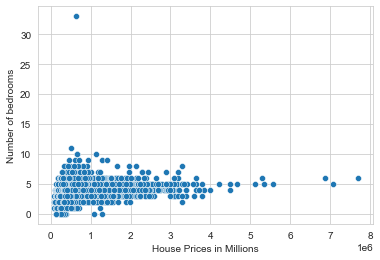

In [100]:
#Scatter plot of pirce vs bedroooms
(sns.scatterplot(x=df['price'], y=df['bedrooms'])).set(xlabel="House Prices in Millions", ylabel = "Number of bedrooms")
#Here, we can infer that most of the homes has bedrooms below 10 and price spent on purchasing the home is below $4 millions   

# Relationship Analysis

Index(['price', 'sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms',
       'sqft_basement', 'bedrooms', 'lat', 'floors'],
      dtype='object')


<AxesSubplot:>

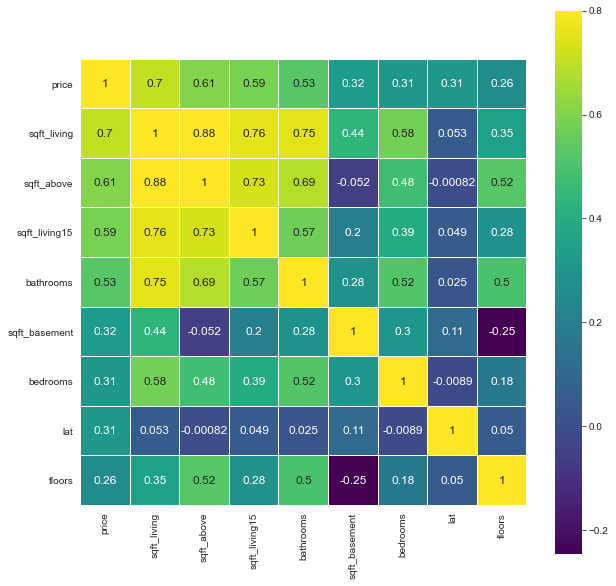

In [101]:
#heat map to find out the corelation between various columns.
numeric_features=df.select_dtypes(include=[np.number])
correlation=numeric_features.corr()
k=9
cols=correlation.nlargest(k,'price')['price'].index
print(cols)
cm=np.corrcoef(df[cols].values.T)
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(cm,vmax=.8,linewidth=0.01,square=True,annot=True,cmap='viridis',linecolor='white',xticklabels=cols.values,
annot_kws={'size':12},yticklabels=cols.values)
#if the values are colser to 1, then those two corrsponding columns are highly coreleted.

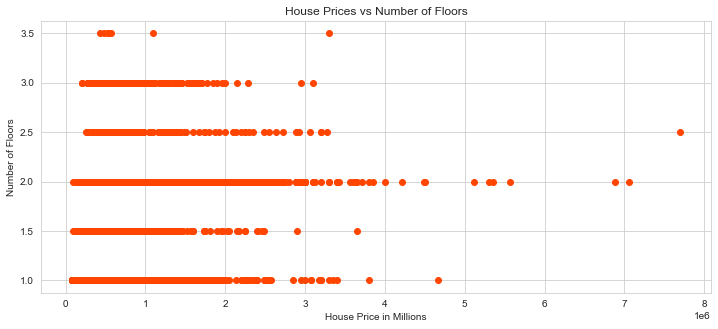

In [102]:
#scatter plot depicing the distribution of floors vs price
fig, ax = plt.subplots(1, figsize=(12,5))
plt.title("House Prices vs Number of Floors")
plt.xlabel("House Price in Millions")
plt.ylabel("Number of Floors")
(plt.scatter('price', 'floors', data=df, color='orangered'))

# Hypothesis Testing

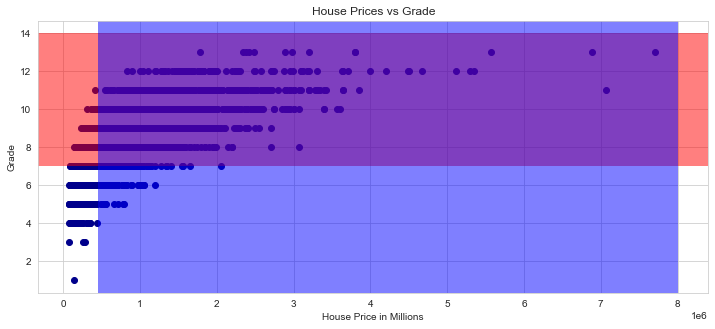

In [103]:
#Do the prices above the median price has homes with a grade greater than 7?
fig, ax = plt.subplots(1, figsize=(12,5))
plt.title("House Prices vs Grade")
plt.xlabel("House Price in Millions")
plt.ylabel("Grade")
plt.axhspan(7,14, color='r', alpha=0.5, lw=0)
plt.scatter('price', 'grade', data=df, color='darkblue')
plt.axvspan(df['price'].median(),8000000, color='b', alpha=0.5, lw=0)

#Yes, From the figure we can infer that most of the homes above median price has grade greater than 7. We can observe- 
#-by the double shaded area 



[Text(0.5, 6.799999999999994, 'Built year'),
 Text(-7.324999999999996, 0.5, 'Count')]

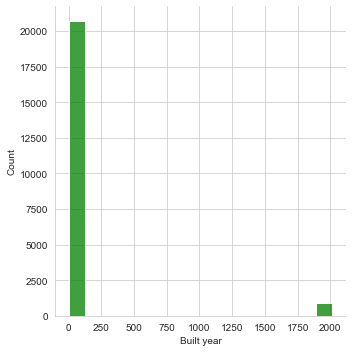

In [104]:
#Do most of the customers prefer to buy renovated houses? (Yes/NO)
(sns.displot(df, x="yr_renovated", multiple="stack", color="g")).ax.set(xlabel="Built year", ylabel = "Count")
#No, From the figure we can infer that people tend to buy non renovated houses as we can see the bar length is highest at x=0.

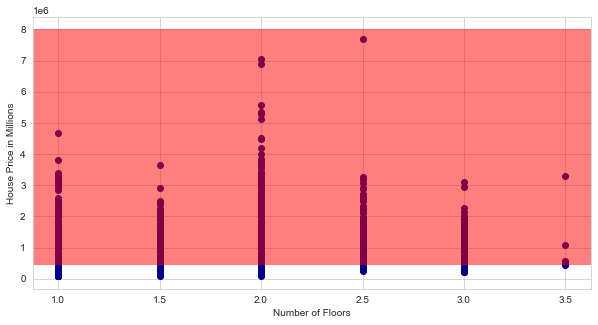

In [105]:
#Do most of the customers prefer to buy houses with price lower than median price opts for multi-storied house ? (Yes/NO)
fig, ax = plt.subplots(1, figsize=(10,5))
plt.xlabel("Number of Floors")
plt.ylabel("House Price in Millions")
plt.axhspan(df['price'].median(),8000000, color='r', alpha=0.5, lw=0)
plt.scatter('floors', 'price', data=df, color='darkblue')

#Here, the shared area represents the datapoints for the one who is spending greater than median price.
#From the below plot we can conclude that Yes, most of the ones who are spending greater than median price opts for-
#-multi-storied house.

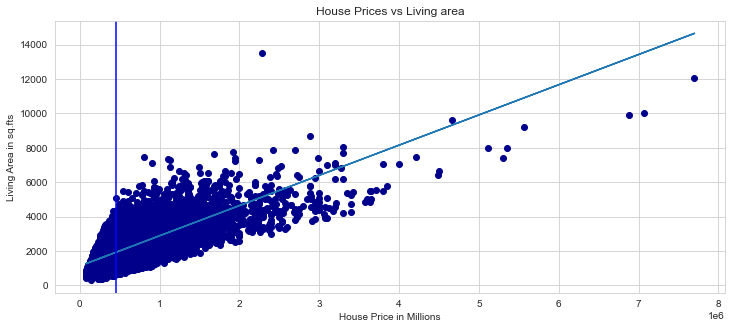

In [106]:
#Do the ones who are spending higher than median opts for larger floor space in living area(sqfts)
fig, ax = plt.subplots(1, figsize=(12,5))
plt.title("House Prices vs Living area")
plt.xlabel("House Price in Millions")
plt.ylabel("Living Area in sq.fts")
plt.scatter('price', 'sqft_living', data=df, color='darkblue')


x=df['price']
y=df['sqft_living']
m, b = np.polyfit(x,y, 1)
plt.plot(x, m*x + b)

plt.axvline(x = df['price'].median(), color = 'b')
#From the figure we can observe that both the variables has good corelation and the data points right to the vertical line- 
#-at median price are the data points for prices above median points. From the slope line we can interpret that-  
#-ones who are spending higher than median opts for larger floor space in living area